# Assignment 5 - 70 points possible

## Apple, Bird, Cookie:
## Data from Google's Quick, Draw!  Game

*Note:  This assignment will require you to train neural networks until they have stopped improving.  When you turn in your assignment, it must have the evidence of having run the networks.  It will be a -3 penalty per network if the TAs need to run train a network from scratch.*

*Also note that Google Colab limits your GPU use, so don't waste cycles on code you haven't thought through!  You should have enough quota to do the assignment with a reasonable number of do-overs, but the quota isn't infinite.  If you run out, or you're just worried about running out, consider migrating to the SCC (see below).*

We will perform 2 tasks in this homework.  The first is to build a classifier that can tell whether a drawing is of an apple, a bird, or a cookie.  The data is taken from a game you can play online, developed by Google, called Quick, Draw!  The drawings are all Pictionary-style quick sketches of things.  Google has already done the work of turning the drawings into grayscale 28 x 28 images that are good for machine learning.  Since the images don't have that many pixels, the drawings are simplified, and there is a lot of data, this is an example of a relatively easy task for machine learning generally and neural networks in particular.  (There are many similar datasets here:  https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap;tab=objects?pli=1&prefix=&forceOnObjectsSortingFiltering=false)

Before you do anything else in this assignment, it's *strongly recommended* that you do two things with your Google Colab setup.  First, go to the upper right and select "Connect to a hosted runtime."  Second, go to the menu at the top and select Runtime->Change runtime type->Pick (any) GPU.  Selecting a GPU will dramatically speed up the training times for the neural networks in this assignment.  But, picking a GPU also resets the runtime, which is why you should do this before anything else.

Download the two zip files associated with this homework at https://drive.google.com/file/d/14ZkNqKC34mUW5yUa6WjYWf1R-CempaoB/view?usp=sharing and https://drive.google.com/file/d/14UmGyFC_WSywNcm2yrCfe0x04IuA42O8/view?usp=sharing and place them in your own Google Drive.  Then run the code boxes below (possibly modifying the path) to mount the drive and unzip the files.

### Alternate setup:  SCC

To use Jupyter Notebook with the SCC, go to

https://scc-ondemand2.bu.edu/pun/sys/dashboard

Go to Interactive Apps at the top, and select Jupyter notebook.  You'll have some options on startup - for this assignment, try to load the tensorflow module as you start up.  If you refresh the page that results, you should eventually be able to click through to a familiar Jupyter notebook interface, where you can upload and start the assignment.

I've uploaded and decompressed the images for the assignment in

/projectnb/ds340/materials/

so you should be able to access them without downloading or decompressing your own images; just add this to the beginning of each path in the np.load and tf.keras.preprocessing.image_dataset_from_directory calls.  E.g.,

apples = np.load('/projectnb/ds340/materials/full_numpy_bitmap_apple.npy')

Matt Frysinger <- Collaborator

In [ ]:
# Assuming you are using Google Colab...
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# You may need to change "NNAssign" to your own directory name



In [2]:
# See instructions above for how to modify for the SCC
import numpy as np

apples = np.load('gdrive/MyDrive/full_numpy_bitmap_apple.npy')
birds = np.load('gdrive/MyDrive/full_numpy_bitmap_bird.npy')
cookies = np.load('gdrive/MyDrive/full_numpy_bitmap_cookie.npy')

We'll handle some of the data munging for you here.  We'll create the all_kinds features by concatenating the apples, birds, and cookies data.  We'll create a long vector of labels.  And we'll do a train-test split on both.

In [3]:
all_kinds = np.concatenate((apples,birds,cookies))

In [4]:
# Note that labels should be 0 to n-1 to work with to_categorical
labels = [0]*len(apples)+[1]*len(birds)+[2]*len(cookies)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(all_kinds, labels)

(1, 2pts) This data ranges from 0 to 255, which is not a great range for neural networks to work with.  Scale the features to the range [0, 1].

In [6]:
# TODO - trivial but easy to forget
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


(2, 2pts) Call x_train.reshape() and x_test.reshape() so that their dimensions are length-of-data x 28 x 28.

In [7]:
x_train[0].shape

(784,)

In [8]:
# TODO x_train
x_train = x_train.reshape(len(x_train),28, 28)


In [9]:
# TODO x_test
x_test = x_test.reshape(len(x_test), 28, 28)


If your reshape worked correctly, the following code should show a apple, bird, or cookie sketch.  If it didn't work, it will look like random noise.  If you're not sure, you can always try more images.

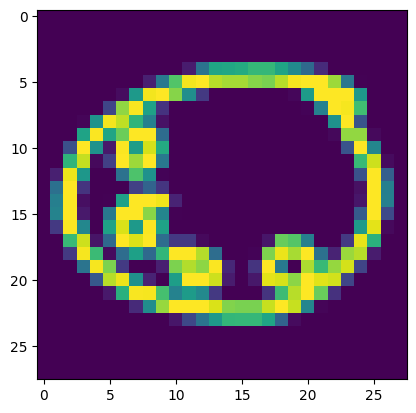

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # Should be a recognizable image if we reshaped correctly

As the last step before creating the neural network, we will turn the labels into one-hot encodings.

In [11]:
from tensorflow import keras
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(3, 9pts) Rather than create a network completely from scratch, it makes sense to start with a network that you know does something similar.  One of the keras tutorials shows how to do digit recognition with a relatively small deep neural network.  The dataset, the MNIST digit dataset, is very similar to ours because it consists of 28 x 28 black and white line drawings.  Consult the "Build a Model" and "Train the model" sections of https://keras.io/examples/vision/mnist_convnet/ and get that neural network running on our apple, bird, and cookie data.  (Be sure to leave a comment indicating that you borrowed the structure from there.)


In [12]:
# Network structure from https://keras.io/examples/vision/mnist_convnet/

from tensorflow.keras import layers
import numpy as np

input_shape = (28, 28, 1)
num_classes = 3

# Borrowed from the Keras MNIST convnet tutorial
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])



In [14]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9760 - loss: 0.0754 - val_accuracy: 0.9809 - val_loss: 0.0597
Epoch 2/3
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9779 - loss: 0.0688 - val_accuracy: 0.9823 - val_loss: 0.0554
Epoch 3/3
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9791 - loss: 0.0652 - val_accuracy: 0.9808 - val_loss: 0.0594


(4, 2pts) Evaluate the model on the test set with the code below.  You should have a test accuracy well above 90%.

In [15]:
# TODO
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06424263119697571
Test accuracy: 0.9796215295791626


## Cats and Dogs

It was relatively easy to get good performance on that task, because the size of each input is small and the features needed for success weren't too complicated.  We'll now try a classification task with real images.  This is a moderately well-known "cats and dogs" dataset.  Unzip the dogs-vs-cats dataset in the current directory.  You can examine the files to see pictures of cats and dogs with varying dimensions and varying poses.

In [16]:
# Again, assumes Google Colab - skip if no
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
!unzip gdrive/MyDrive/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogs-vs-cats/train/cats/cat.2260.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.2260.jpg  
  inflating: dogs-vs-cats/train/cats/cat.594.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.594.jpg  
  inflating: dogs-vs-cats/train/cats/cat.5269.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.5269.jpg  
  inflating: dogs-vs-cats/train/cats/cat.2506.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.2506.jpg  
  inflating: dogs-vs-cats/train/cats/cat.11051.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.11051.jpg  
  inflating: dogs-vs-cats/train/cats/cat.3618.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.3618.jpg  
  inflating: dogs-vs-cats/train/cats/cat.4177.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.4177.jpg  
  inflating: dogs-vs-cats/train/cats/cat.8995.jpg  
  inflating: __MACOSX/dogs-vs-cats/train/cats/._cat.8995.jpg  
  inflating: dogs-vs-cats/tra

In [ ]:
!ls

dogs-vs-cats  drive  gdrive  __MACOSX  sample_data


In [18]:
# Modify paths here if working in the SCC
import tensorflow as tf
image_size = (180, 180)
batch_size = 32
# Data from https://www.kaggle.com/competitions/dogs-vs-cats/
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs-vs-cats/train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


(5, 9pts) We'll suppose that the closest starting point network we have on hand for this is the MNIST network again.  Adapt it to this dataset with the following changes:

* The input shape is 180 x 180 x 3.
* Put the rescaling of dividing values by 255 in the network itself with a layers.Rescaling() layer after the Input layer.  https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling
* Remove dropout for now.  We will add it back in once we've settled on a good number of layers.
* The final "softmax" activation function is only appropriate for multiclass classification.  Change this to a more appropriate activation function for binary classification.
* Name the model model2 to work with the training code below.

In [19]:
input_shape = (180, 180, 3)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Model from https://keras.io/examples/vision/mnist_convnet/
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1. / 255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

You can train the network using the following code.  Expect validation accuracy of roughly 76%.

In [20]:
epochs = 15

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

import keras.callbacks
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)  # Quit after 3 rounds of no validation loss improvement
]

model2.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks) # Validation data instead of fraction

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.6273 - loss: 0.6393 - val_accuracy: 0.7662 - val_loss: 0.4825
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.7773 - loss: 0.4752 - val_accuracy: 0.7804 - val_loss: 0.4702
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.8227 - loss: 0.3965 - val_accuracy: 0.7720 - val_loss: 0.5124
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8600 - loss: 0.3229 - val_accuracy: 0.7786 - val_loss: 0.5425
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8902 - loss: 0.2577 - val_accuracy: 0.7728 - val_loss: 0.6043


(6, 12pts) Experiment with making the architecture deeper.  Train at least 3 different architectures that each has more layers than the preceding architecture.  At the end, summarize what how your three architectures were different, and which had the best performance.  (The best performance is measured by the peak validation accuracy, not the validation accuracy on the last epoch.)  Do not add any regularization yet.

You might consider continuing the pattern of convolutional and pooling layers started in the MNIST architecture; or you could try adding another dense layer; or you could try some other layer as long as it does not perform regularization, since we are currently doing the opposite thing, "expanding capacity."

The solution code achieves a validation accuracy of 88% here, but it's possible you'll discover something better.  Aim for at least 85%.

In [ ]:
model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dense(num_classes, activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 15

model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]
model3.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.5691 - loss: 0.6668 - val_accuracy: 0.7282 - val_loss: 0.5445
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7122 - loss: 0.5612 - val_accuracy: 0.7446 - val_loss: 0.5166
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.7629 - loss: 0.4961 - val_accuracy: 0.7424 - val_loss: 0.5241
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.8085 - loss: 0.4189 - val_accuracy: 0.7286 - val_loss: 0.6240
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.8486 - loss: 0.3463 - val_accuracy: 0.7306 - val_loss: 0.6357


In [ ]:
model4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 15

model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]
model4.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.6290 - loss: 0.6294 - val_accuracy: 0.7514 - val_loss: 0.5128
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.7553 - loss: 0.5008 - val_accuracy: 0.7682 - val_loss: 0.4868
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.8075 - loss: 0.4222 - val_accuracy: 0.8136 - val_loss: 0.4164
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.8333 - loss: 0.3685 - val_accuracy: 0.8262 - val_loss: 0.3999
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8619 - loss: 0.3195 - val_accuracy: 0.8304 - val_loss: 0.4154
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.8905 - loss: 0.2691 - val_accuracy: 0.8340 - val_loss: 0.4287
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9089 - loss: 0.2197 - val_accuracy: 0.8268 - val_loss: 0.4841


In [ ]:
model5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 15

model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]
model5.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.5790 - loss: 0.6692 - val_accuracy: 0.7162 - val_loss: 0.5584
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.7268 - loss: 0.5427 - val_accuracy: 0.7394 - val_loss: 0.5163
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.7933 - loss: 0.4421 - val_accuracy: 0.8118 - val_loss: 0.4225
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8386 - loss: 0.3637 - val_accuracy: 0.8364 - val_loss: 0.3724
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.8699 - loss: 0.3063 - val_accuracy: 0.8648 - val_loss: 0.3189
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 58ms/step - accuracy: 0.8919 - loss: 0.2548 - val_accuracy: 0.8626 - val_loss: 0.3275
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 47ms/step - accuracy: 0.9081 - loss: 0.2236 - val_accuracy: 0.8722 - val_loss: 0.3093
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - accuracy: 0.9194 - loss: 0.1873 - 

**TODO summarize how architectures were different from each other and which performed best**

The first model added an extra dese layer, which did not help. It actually made the model worse! Then the second model used an extara convolutional layer and MaxPooling layer in an increased size which helped. Then the last model used a triangle approach, passing larger convolutional layers and then shriking to narrow on a solution. This last one learned slower, but it overfit less and got a much better accuracy.

(7, 8pts) When the accuracy on the training data is higher than the validation accuracy, this is evidence of overfitting.  We're already employing one method of combatting overfitting with our early stopping callback. Some other approaches to handling overfitting are:

* Dropout.
* Data augmentation.

Train a new network that adds a layer of dropout and two kinds of data augmentation to your best architecture.  (The solution code here achieves validation accuracy of roughly 92%.)

In [ ]:
model6 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.RandomFlip("horizontal"),
        layers.RandomCrop(180, 180),
        layers.Rescaling(1./255),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [ ]:
epochs = 20

model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]
model6.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.5678 - loss: 0.6761 - val_accuracy: 0.7024 - val_loss: 0.5566
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.7031 - loss: 0.5700 - val_accuracy: 0.7874 - val_loss: 0.4461
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.7750 - loss: 0.4751 - val_accuracy: 0.8166 - val_loss: 0.4058
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.8098 - loss: 0.4136 - val_accuracy: 0.8392 - val_loss: 0.3568
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.8441 - loss: 0.3564 - val_accuracy: 0.8706 - val_loss: 0.2902
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.8645 - loss: 0.3125 - val_accuracy: 0.8712 - val_loss: 0.2972
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - accuracy: 0.8857 - loss: 0.2739 - val_accuracy: 0.8954 - val_loss: 0.2466
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.9010 - loss: 0.2412 - 

**(8, 7pts)** Now try an architecture that uses transfer learning from VGG16 (code was distributed in lecture).  You should achieve a validation accuracy of roughly 96%.

In [21]:
# TODO
from keras.applications.vgg16 import VGG16
from keras.models import Model

modelvg = VGG16(include_top=False, input_shape=(180,180,3)) # we'll replace the "top" with our own layers
for layer in modelvg.layers:
    layer.trainable = False  # these won't learn
# add new classifier layers
flat = layers.Flatten()(modelvg.layers[-1].output) # connect to last layer of VGG
drop1 = layers.Dropout(0.5)(flat)
cls = layers.Dense(128, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(cls)
output = layers.Dense(10, activation='softmax')(drop2)

modelvg = Model(inputs=modelvg.inputs, outputs=output)
# compile model - note we never did to_categorical so we'll use
# sparse_categorical_crossentropy
modelvg.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelvg.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_16']
Received: inputs=Tensor(shape=(None, 180, 180, 3))
  warnings.warn(msg)


625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 187ms/step - accuracy: 0.8795 - loss: 3.6389 - val_accuracy: 0.9552 - val_loss: 0.1229
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 210ms/step - accuracy: 0.9375 - loss: 0.2024 - val_accuracy: 0.9542 - val_loss: 0.1214
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 209ms/step - accuracy: 0.9464 - loss: 0.1609 - val_accuracy: 0.9638 - val_loss: 0.1078
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 209ms/step - accuracy: 0.9549 - loss: 0.1445 - val_accuracy: 0.9646 - val_loss: 0.0901
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 209ms/step - accuracy: 0.9536 - loss: 0.1446 - val_accuracy: 0.9670 - val_loss: 0.1032
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 210ms/step - accuracy: 0.9581 - loss: 0.1297 - val_accuracy: 0.9644 - val_loss: 0.1080
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 206ms/step - accuracy: 0.9557 - loss: 0.1393 - val_accuracy: 0.9618 - val_loss: 0.0933


(9, 19pts) Last, answer these questions.

(a, 6 pts) Suppose we have a small perceptron with 2 inputs, no hidden units, and one output unit (that has a bias input).  The 2 inputs represent car attributes:  cost (normalized to [0,1]), and mileage on the car (normalized to [0,1]).  Assume the input neurons have no activation functions.  Can this tiny network learn the rule, “fire if cost < 0.5, or mileage < 0.5”?  If so, specify the weights in the network.  If not, describe the smallest network you can that can effectively represent this rule (assuming the inputs still don’t have activation functions and the output neuron’s activation function is a step function) - give specific weights that would work.

Yes, you could set up x1, cost, x2, mileage, w1 and w2 weights, and b bias. set equation w1x1 + w2x2 +b >= 0 with weights w1 = -1 and w2 = -1, b = 1


(b, 3pts) Give values for a 3x3 convolutional filter that would plausibly detect small X’s in a black and white image image - the meeting of two diagonal lines. Assume the lines are both white or both black (your choice).  (Hint:  Make sure it isn't indifferent between a black X and a 3x3 black square, for example - it should "prefer" the X with greater output.)

**TODO**

[1  -1   1]  
[-1  4  -1]  
[1  -1   1]

(c, 3pts) Transfer learning is effective, and it's more effective the more similar the original task was to the present one.  Skim the Wikipedia page on ImageNet, the dataset used to train VGG-16 (and maybe follow up by searching this subset of ImageNet's classes: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Is there reason to think transfer learning with VGG-16 might be particularly effective for classifying cats and dogs?

**TODO**

Transfer learning seems ideal here since ImageNet has classifcations for many many types of dogs and cats, so the network is already ideal for doing classifications within those categories. So it should work for classifications of those categories even better

(d, 3pts) Suppose we introduce a new activation function in all the neurons in
our neural network, g(x) = sin(x). We then notice vanishing gradient problems. What are some values of x that would be particularly problematic for this function in backpropagation?

values close to zero, so anything close to π/2 + zπ




(e, 4pts) A museum wants to train a neural network to identify plants, using museum plant specimens. In some cases they only have one example of a species, though, making a train/test split difficult.  They decide to use data augmentation in these cases, putting most of the augmented images in the training set with the original image, but also putting a few augmented images in the test set in each case.  Will this classifier have good performance "in the wild" on these species?  Why or why not?  Would we get better performance if we just trained on the unaugmented, single image?

It probably wouldnt work, as the model may just get wise to these augmentations. The lack of real variation means the model couldn't learn the real world differences between the plants. However, just using one image, would be worse, as the model couldn't learn anything at all!

**When you're done, use "File->Download .ipynb" and upload your .ipynb file to Blackboard, along with a PDF version (File->Print->Save as PDF) of your assignment.**